# Project: Investigate a Dataset (tmdb_movie.csv)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

># Overview
>For Completing the first project in my advanced data analysis course, I have choosed this dataset.
>
>This data set contains information about 10,000 movies (10866 movies to be exact) collected from The Movie Database (TMDb), including user ratings and revenue. It is formed up of 21 columns that includes movie: id, director, tagline, genre, vote count, and more.
>
># Questions I have choosed to analyse from this dataset
>
> 01) Which year was dominante in terms of movie production?<br/>
> 02) Was that year dominant in terms of profits?<br/>
> 03) Which movie has the highest profit and which one has the least?<br/>
> 04) Are there any movies that had no profits? which ones and what was its production year?<br/>
> 05) Does the runtime duration affect the movie votes?<br/>
> 06) Does movies runtime duration increase through each year?<br/>
> 07) what is the pobularity average for different movies runtime?<br/>
> 08) Which movies has the longest and shortest runtime?<br/>
> 09) Who are the common directors between all of these movies?<br/>
> 10) What are these directors reputations in movies?<br/>
> 11) What are the successful genres?<br/>
> 12) What genres attract more viewers?<br/>
> 13) What are the most popular genres between viewers?
> 14) Who made the most casts?

In [1]:
# Use this cell to set up import statements for all of the packages that you plan to use.
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Remember to include a 'magic word' so that your visualizations are plotted
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> After looking at the head of the dataset and comparing it with the proposed questions. I will be deleting the unnecessary columns keeping only the usefull ones for my analysis.

### General Properties

In [2]:
# Load your data and print out a few lines.
# Loading the dataset into a dataframe variable (df)
df = pd.read_csv("tmdb-movies.csv")
# Printing the first 10 lines of the dataset
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

<br/>

In [3]:
# Printing the last 10 lines of the dataset
df.tail(20)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10846,17102,tt0059127,0.212716,0,0,Dracula: Prince of Darkness,Christopher Lee|Barbara Shelley|Andrew Keir|Fr...,NaN,Terence Fisher,"DEAD for Ten Years DRACULA, Prince of Darkness...",...,"Whilst vacationing in the Carpathian Mountain,...",90,Horror,Seven Arts Productions|Hammer Film Productions,1/9/66,16,5.7,1966,0.000000e+00,0.000000e+00
10847,28763,tt0060548,0.034555,0,0,Island of Terror,Peter Cushing|Edward Judd|Carole Gray|Eddie By...,NaN,Terence Fisher,How could they stop the devouring death...that...,...,A small island community is overrun with creep...,89,Science Fiction|Horror,Planet Film Productions|Protelco,6/20/66,13,5.3,1966,0.000000e+00,0.000000e+00
10848,2161,tt0060397,0.207257,5115000,12000000,Fantastic Voyage,Stephen Boyd|Raquel Welch|Edmond O'Brien|Donal...,NaN,Richard Fleischer,A Fantastic and Spectacular Voyage... Through ...,...,The science of miniaturization has been unlock...,100,Adventure|Science Fiction,Twentieth Century Fox Film Corporation,8/24/66,42,6.7,1966,3.436265e+07,8.061618e+07
10849,28270,tt0060445,0.206537,0,0,Gambit,Michael Caine|Shirley MacLaine|Herbert Lom|Joh...,NaN,Ronald Neame,Shirley MacLaine raises Michael Caine!,...,Harry Dean (Michael Caine) has a perfect plan ...,109,Action|Comedy|Crime,Universal Pictures,12/16/66,14,6.1,1966,0.000000e+00,0.000000e+00
10850,26268,tt0060490,0.202473,0,0,Harper,Paul Newman|Lauren Bacall|Julie Harris|Arthur ...,NaN,Jack Smight,Harper takes a case - and the payoff is murder.,...,Harper is a cynical private eye in the best tr...,121,Action|Drama|Thriller|Crime|Mystery,Warner Bros.,2/23/66,14,6.0,1966,0.000000e+00,0.000000e+00
10851,15347,tt0060182,0.342791,0,0,Born Free,Virginia McKenna|Bill Travers|Geoffrey Keen|Pe...,NaN,James Hill,From The Pages Of The Beloved Best Seller... A...,...,Born Free (1966) is an Open Road Films Ltd./Co...,95,Adventure|Drama|Action|Family|Foreign,High Road,6/22/66,15,6.6,1966,0.000000e+00,0.000000e+00
10852,37301,tt0060165,0.227220,0,0,A Big Hand for the Little Lady,Henry Fonda|Joanne Woodward|Jason Robards|Paul...,NaN,Fielder Cook,All the action you can take...all the adventur...,...,A naive traveler in Laredo gets involved in a ...,95,Western,Eden Productions Inc.,5/31/66,11,6.0,1966,0.000000e+00,0.000000e+00
10853,15598,tt0060086,0.163592,0,0,Alfie,Michael Caine|Shelley Winters|Millicent Martin...,NaN,Lewis Gilbert,Is any man an Alfie? Ask any girl!,...,The film tells the story of a young man who le...,114,Comedy|Drama|Romance,NaN,3/29/66,26,6.2,1966,0.000000e+00,0.000000e+00
10854,31602,tt0060232,0.146402,0,0,The Chase,Marlon Brando|Jane Fonda|Robert Redford|E.G. M...,NaN,Arthur Penn,The chase is on!,...,Most everyone in town thinks that Sheriff Cald...,135,Thriller|Drama|Crime,Horizon Pictures|Columbia Pictures Corporation,2/17/66,17,6.0,1966,0.000000e+00,0.000000e+00
10855,13343,tt0059221,0.141026,700000,0,The Ghost & Mr. Chicken,Don Knotts|Joan Staley|Liam Redmond|Dick Sarge...,NaN,Alan Rafkin,G-G-GUARANTEED! YOU'LL BE SCARED UNTIL YOU LAU...,...,Luther Heggs aspires to being a reporter for h...,90,Comedy|Family|Mystery|Romance,Universal Pictures,1/20/66,14,6.1,1966,4.702610e+06,0.000000e+00


<br/>

In [4]:
# Check columns formats
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Observations

> The dataset does indeed has many unusefull columns. Since the movies' title exists there is no need to group any of them using numeric IDs.
>
> The Budget and Revenue (including those with _adj) doesn't have currency unit. I will stick with the Dollar sign since it's the international currency.
>
> There seems to be movies that has no revenue at all!
>
> After looking at the tail of the dataset, It seems that I can't get rid of the vote_counts as some vote_average for 0\$ revenues are high but vote_counts are low. So i will use this to distinguish successfull movies from that are not.
>
> I've also observed that there are movies with 0\$ budget and revenues. Analysis can't deduce any kind of relations between it and the others so it will need to be discarded.

### Data Cleaning

> 1) Delete the unused columns to simplify the dataset overview.<br/>
> 2) Remove duplicates if they exists.<br/>
> 3) Remove 0\$ budget and reveunues.<br/>
> 4) Change any unappropriate column datatypes.

> Another value will be assigned to the cleaned dataset as we might use the old uncleaned dataset. (df_cleaned)

In [5]:
df_cleaned = df.copy()

<br/>

### 1) Delete unused columns

> a) Since the movies' title exists there is no need for the id and imdb_id columns.<br/>
> b) the homepage column has lots of null values, in addition to that it has no use for the analysis.<br/>
> c) movie discription columns will not be used (tagline, overview, keywords).<br/>
> d) we only care about the release year of the movie not the exact date so release_date will be discarded.<br/>
> e) The budget_adj and revenue_adj columns will not be used.<br/>
> f) The vote count for all movies are all different so we can't count on it for analysis.<br/>
> g) production_companies column won't be used in the analysis.

In [6]:
# Specify "to delete columns"
cols_to_del = ["id", "imdb_id", "homepage", "tagline", "overview", "keywords", "release_date", "budget_adj", "revenue_adj", "vote_count", "production_companies"]

# Delete columns
df_cleaned.drop(cols_to_del, axis=1, inplace=True)

# Preview changes
df_cleaned.head(5)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,7.3,2015


<br/>

### 2) Remove Duplicates

In [7]:
# Check if there is any duplicates
df_cleaned.duplicated().sum() # output => 1

1

In [8]:
# There seems to be one row is duplicated, let's remove it
df_cleaned.drop_duplicates(inplace=True)

In [9]:
# Recheck
df_cleaned.duplicated().sum()

0

In [10]:
# Confirm (before remove there was 10866 rows)
df_cleaned.shape

(10865, 10)

### 3) Remove 0\$ budget and revenue records

> To remove 0\$ budget and revenue records, a small trick will be used. I will use the pd.dropna() method after replacing the zeros with np.NAN.

In [11]:
# Columns to edit are ["budget", "revenue"]
df_cleaned[["budget", "revenue"]] = df_cleaned[["budget", "revenue"]].replace(0, np.NAN)

# Drop NAN values
# I've known about the subset argument from this link: (after searching for "df.dropna() axis")
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
df_cleaned.dropna(subset=["budget", "revenue"], inplace=True)

In [12]:
# Check how many records we have now
df_cleaned.shape

(3854, 10)

> WOW!, That's alot of records that have been discarded!

### 4) Change any unappropriate column datatypes

In [13]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      3854 non-null   float64
 1   budget          3854 non-null   float64
 2   revenue         3854 non-null   float64
 3   original_title  3854 non-null   object 
 4   cast            3850 non-null   object 
 5   director        3853 non-null   object 
 6   runtime         3854 non-null   int64  
 7   genres          3854 non-null   object 
 8   vote_average    3854 non-null   float64
 9   release_year    3854 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 331.2+ KB


both budget and revenue columns are in float datatype, we need to change them into ints since there are no decimal values in them.

In [14]:
# Convert datatypes from float to int
df_cleaned["budget"] = df_cleaned["budget"].astype(np.int64)
df_cleaned["revenue"] = df_cleaned["revenue"].astype(np.int64)
df_cleaned.dtypes

popularity        float64
budget              int64
revenue             int64
original_title     object
cast               object
director           object
runtime             int64
genres             object
vote_average      float64
release_year        int64
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (Number of movies production over the years)

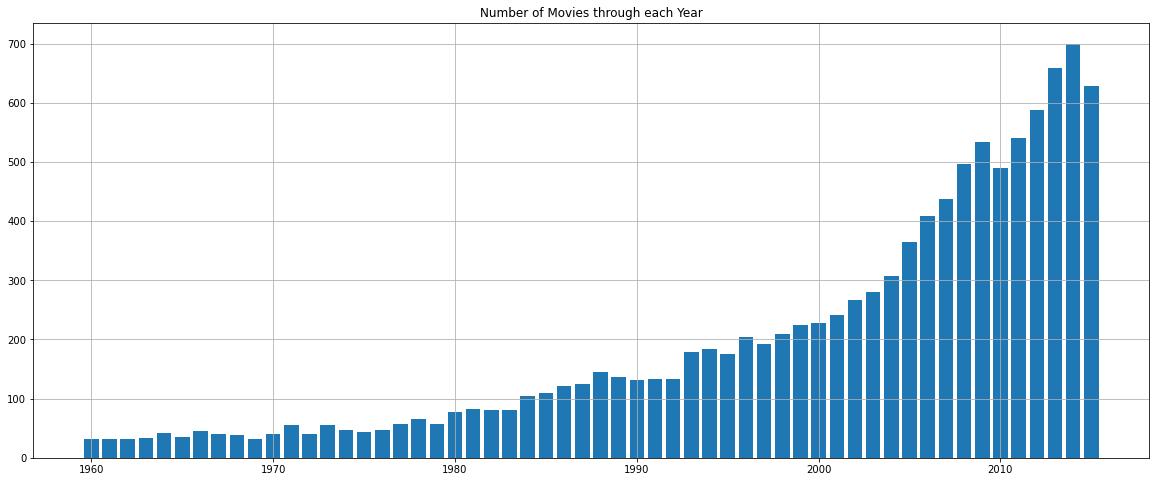

In [15]:
# To answer this we need to plot all of the produced movies and group them by their release date
# In this case we will use the old dataframe since the cleaned one has many trimmed records
movies_vs_year = df.groupby("release_year")[["original_title"]].count()
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.bar(x=movies_vs_year.index, height=movies_vs_year["original_title"])
ax1.grid()
ax1.set_title("Number of Movies through each Year")
plt.show()

It seems that the most dominant year is 2014 with 700 movies.
But was it the most dominant year in terms of profits?

### Research Question 2 (Profits over the years)

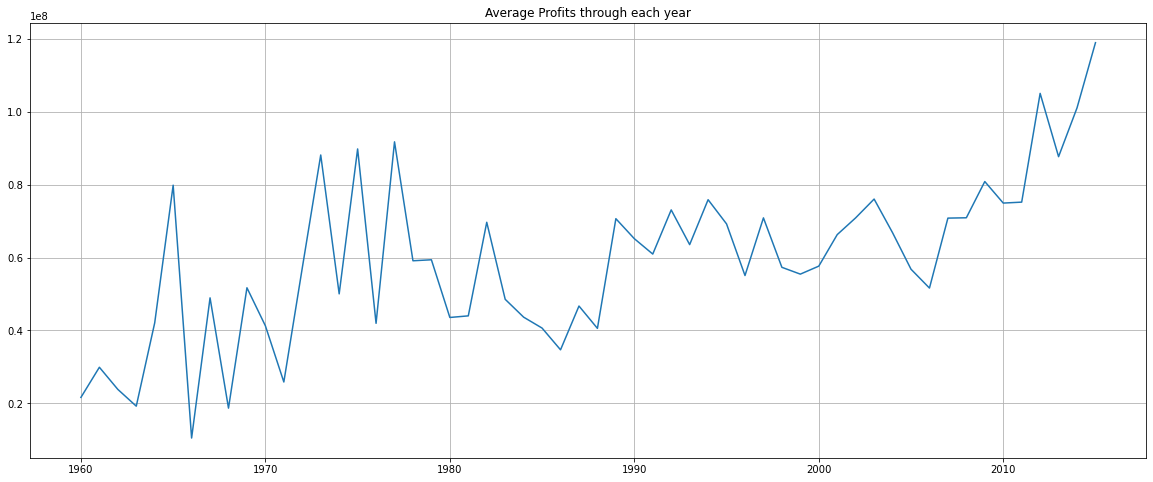

In [16]:
# In this part we would use the cleaned dataset
# Profit = revenue - budget

# Create profit dataframe
profit = pd.DataFrame()

# fill in the data
# Learned about insert method from: https://www.geeksforgeeks.org/python-pandas-dataframe-insert/
df_cleaned.insert(3, "profit", (df_cleaned["revenue"] - df_cleaned["budget"]))


# Get the mean of profits through each year
profit_grouped = df_cleaned.groupby("release_year")["profit"].mean()

# Plot a graph
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.plot(profit_grouped.index, profit_grouped)
ax1.grid()
ax1.set_title("Average Profits through each year")
plt.show()

Turned out that year 2015 has the most profits, let's print the profits of each year and calculate the difference

In [17]:
prof2015 = int(profit_grouped[profit_grouped.index == 2015])
prof2014 = int(profit_grouped[profit_grouped.index == 2014])
print("2015 profits: {}$\n2014 profits: {}$\nDifference: {}$".format(prof2015, prof2014, prof2015-prof2014))

2015 profits: 118950907$
2014 profits: 101067887$
Difference: 17883020$


Then which movie has the highest profit and which one has the lowest?

### Research Question 3  (Movies of highest and lowest profit)

In [18]:
# To avoid repetitive codes or processess, we can use the profit dataframe from Question 1 

# Print out the highest profit
max_profit = df_cleaned[df_cleaned["profit"] == df_cleaned["profit"].max()]
max_profit

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_average,release_year
1386,9.432768,237000000,2781505847,2544505847,Avatar,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,7.1,2009


In [19]:
# Print out the lowest profit
min_profit = df_cleaned[df_cleaned["profit"] == df_cleaned["profit"].min()]
min_profit

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_average,release_year
2244,0.25054,425000000,11087569,-413912431,The Warrior's Way,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,6.4,2010


So the highest profit is the movie with index ID 1386, and the lowest profit is the movie with index ID 2244, Let's print that out from the cleaned dataset

In [20]:
# Extract both movies from the cleaned dataframe
high = df_cleaned[df_cleaned.index == 1386]
low  = df_cleaned[df_cleaned.index == 2244]
# Pandas Transpose method, Known about it from: https://note.nkmk.me/en/python-pandas-t-transpose/
pd.concat([high.T, low.T], axis=1)

,1386,2244
popularity,9.43277,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
profit,2544505847,-413912431
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
director,James Cameron,Sngmoo Lee
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
vote_average,7.1,6.4


From this table we conclude that:<br/>
> 1) Avatar movie has the highest profit that equals 2544505847\\$ <br/>
> 2) The Warrior's Way movie has the least profit that equals -413912431\$

### Research Question 4 (Movies of no profit)

In [21]:
# Before analysing, let's check if there are any movies in either the uncleaned dataframe and the cleaned one
print("Uncleaned data has {} records of 0 runtime\nCleaned data has {} records of 0 runtime".format(df[df["runtime"]==0]["runtime"].count(), df_cleaned[df_cleaned["runtime"]==0]["runtime"].count()))

Uncleaned data has 31 records of 0 runtime
Cleaned data has 0 records of 0 runtime


From the obtained results, we will stick with the cleaned data for this analysis.

In [22]:
# No profit means the difference between both budget and revenue equals zero (budget == revenue)
df_cleaned[df_cleaned["budget"] == df_cleaned["revenue"]]

,popularity,budget,revenue,profit,original_title,cast,director,runtime,genres,vote_average,release_year
5198,0.126182,569217,569217,0,Les Clefs de bagnole,Laurent Baffie|Daniel Russo|Pascal Sellem|GÃ©r...,Laurent Baffie,90,Comedy,4.8,2003
7250,0.082116,823258,823258,0,Narco,Guillaume Canet|Zabou Breitman|Guillaume Galli...,Tristan Aurouet|Gilles Lellouche,105,Comedy,5.8,2004
7813,0.065543,6000,6000,0,Loose Change: Final Cut,NaN,Dylan Avery,129,Documentary,5.1,2007
10777,0.439210,11,11,0,F.I.S.T.,Sylvester Stallone|Rod Steiger|Peter Boyle|Mel...,Norman Jewison,145,Drama|Action,6.7,1978


So there are only 4 movies that had 0\$ profits. It appears also that they don't have good reputation. (low vote counts, and low popularity score)

### Research Question 5 (Movie runtime affect on votes)

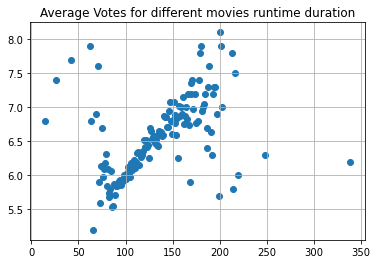

In [23]:
# To answer this we need to group the runtime column and calculate the mean value of the vote_average
runtime_vs_votes = df_cleaned.groupby("runtime")["vote_average"].mean()

# Let's plot this into a scatter plot
fig, ax1 = plt.subplots()
ax1.scatter(x=runtime_vs_votes.index, y=runtime_vs_votes)
ax1.grid()
ax1.set_title("Average Votes for different movies runtime duration")
plt.show()

Observing the graph, It seems like the majority of the votes prefers movies of 80-170 minutes. Let's take a closer look by comparing the votes of movies less and more than the mean of 80-170 minutes which is 125 minutes.

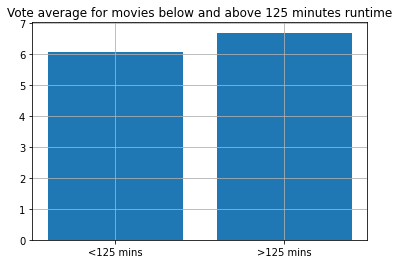

In [24]:
# Group each group of runtime durations in seperate categories and calculate the mean of the votes
runtime_above_125 = df_cleaned[df_cleaned["runtime"] > 125]["vote_average"].mean()
runtime_below_125 = df_cleaned[df_cleaned["runtime"] < 125]["vote_average"].mean()

# Plot the results in a bar chart
fig, ax1 = plt.subplots()
ax1.bar(x=["<125 mins", ">125 mins"], height=[runtime_below_125, runtime_above_125])
ax1.grid()
ax1.set_title("Vote average for movies below and above 125 minutes runtime")
plt.show()

In [25]:
print("Mean of those below 125 mins : {}\nMean of those above 125 mins : {}".format(round(runtime_below_125, 2), round(runtime_above_125, 2)))

Mean of those below 125 mins : 6.06
Mean of those above 125 mins : 6.69


It turns out that the values are really close. Average votes for movies of below 125 mins runtime gets 6.06 out of 10 and for those of above 125 mins get abit higher with 6.69 out of 10. So, movie runtime duration does not affect the votes but the contents of the movie itself, This includes Its' genre and the actions of the movie.<br/><br/>

We are taking vote average as our dependent variable here, how about letting the popularity take the lead?

### Research Question 6 (Runtime vs Popularity)

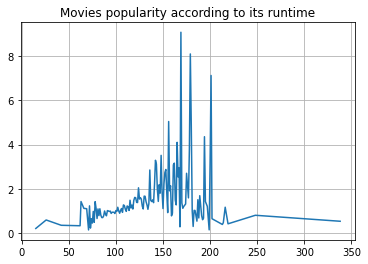

In [26]:
# Let's group by runtime and calculate the popularity average
runtime_vs_popularity = df_cleaned.groupby("runtime")["popularity"].mean()

# Plotting the results
fig, ax1 = plt.subplots()
ax1.plot(runtime_vs_popularity.index, runtime_vs_popularity)
ax1.grid()
ax1.set_title("Movies popularity according to its runtime")
plt.show()

It seems that the audience prefers movies of runtime 150-200 minutes. the range between runtimes of 80-100 minutes also have some audience but i think the reason behind it not having the same rate of audience is the lake of exciting scenes as the movie is short.<br/><br/>

Let's look at another relation considering the runtime, like does it increase each year?

### Research Question 7 (Movies runtime through each year)

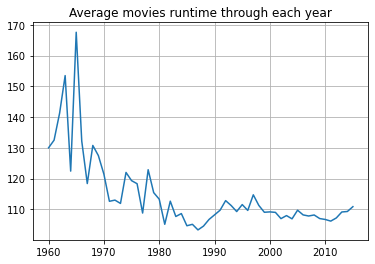

In [27]:
# This can be visualised by getting the mean runtime values and grouping them by year
runtime_vs_years = df_cleaned.groupby("release_year")["runtime"].mean()

# Plot the results
fig, ax1 = plt.subplots()
ax1.plot(runtime_vs_years.index, runtime_vs_years)
ax1.grid()
ax1.set_title("Average movies runtime through each year")
plt.show()

It seems that there were some huge jumps through the decade between 1960-1970, But it began to decrease after that.

In [28]:
df_cleaned["runtime"].describe()

count    3854.000000
mean      109.220291
std        19.922820
min        15.000000
25%        95.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Looking at the calculations, The following can be deduced:<br/>
>    1) 25% of the movies in the dataset have runtime less than 95 minutes.<br/>
>    2) 50% (The median) of the movies have runtime less than 106 minutes.<br/>
>    3) 75% of the movies have runtime less than 119 minutes.<br/>
>    4) The longest runtime of this dataset is 338 minutes long.<br/>
>    5) The shortest runtime of this dataset is 15 minutes long.<br/>

<br/>
Let's check which movies have these longest and shortest runtimes.

### Research Question 8 (Movies of longest and shortest runtime)

In [29]:
# Get the highest and shortest movies runtime info
highest_runtime = df_cleaned[df_cleaned["runtime"] == 338]
shortest_runtime = df_cleaned[df_cleaned["runtime"] == 15]

# Print organised results
pd.concat([highest_runtime.T, shortest_runtime.T], axis=1)

,2107,5162
popularity,0.534192,0.208637
budget,18000000,10
revenue,871279,5
profit,-17128721,-5
original_title,Carlos,Kid's Story
cast,Edgar RamÃ­rez|Alexander Scheer|Fadi Abi Samra...,Clayton Watson|Keanu Reeves|Carrie-Anne Moss|K...
director,Olivier Assayas,Shinichiro Watanabe
runtime,338,15
genres,Crime|Drama|Thriller|History,Science Fiction|Animation
vote_average,6.2,6.8


So the longest runtime in this dataset is 338 minutes long for movie called "Carlos" while the shortest one is 15 minutes long for a movie called "Kid's Story". It looks like neither of them made any profits, and both have low reputation.

### Research Question 9 (Common Directors)

In [30]:
# Count how many times the director participated in movies
# For this question i will use the uncleaned dataframe to count as many movies as possible
cmn_directors = df["director"].value_counts()
cmn_directors.head(10)

Woody Allen          45
Clint Eastwood       34
Steven Spielberg     29
Martin Scorsese      29
Ridley Scott         23
Ron Howard           22
Steven Soderbergh    22
Joel Schumacher      21
Brian De Palma       20
Barry Levinson       19
Name: director, dtype: int64

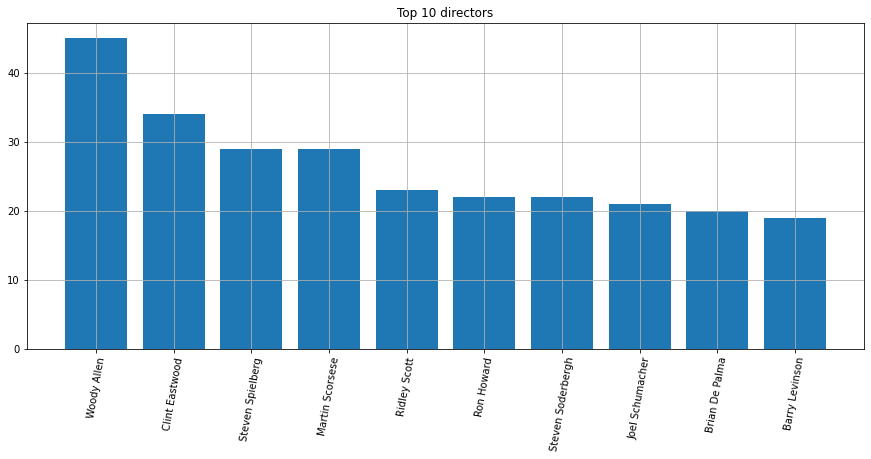

In [31]:
# Let's plot the top 10 into a bar chart

# Select the top 10 directors
cmn_directors = cmn_directors.head(10)

# Plot the results
fig, ax1 = plt.subplots(figsize=(15,6))
ax1.bar(x=cmn_directors.index, height=cmn_directors)
plt.xticks(rotation=80)
ax1.set_title("Top 10 directors")
ax1.grid()
plt.show()

It seems that "Woody Allen" is the most common director with 45 movies. But what about their reputations? do the movies produced by them have good votes?

### Research Question 10 (Directors' reputation in movies)

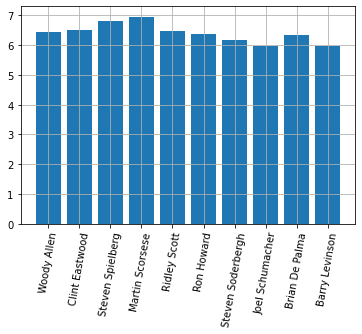

In [32]:
# Let's groupby directors and calculate the average of vote_average
directors_reputation = df.groupby("director")["vote_average"].mean()

# Utilizing left merge to filter the top directors' average votes
reputation_by_votes = pd.merge(how="left", left=cmn_directors, right=directors_reputation, left_on=cmn_directors.index, right_on=directors_reputation.index)

# Let's plot the results
fig, ax1 = plt.subplots()
ax1.bar(x=reputation_by_votes["key_0"], height=reputation_by_votes["vote_average"])
plt.xticks(rotation=80)
ax1.grid()
plt.show()

That's for the average movie votes, let's check their popularity

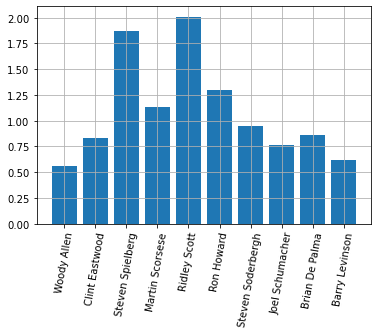

In [33]:
# Let's groupby directors and calculate the average of popularity
directors_reputation = df.groupby("director")["popularity"].mean()

# Utilizing left merge to filter the top directors' average popularity scores
reputation_by_popularity = pd.merge(how="left", left=cmn_directors, right=directors_reputation, left_on=cmn_directors.index, right_on=directors_reputation.index)

# Let's plot the results
fig, ax1 = plt.subplots()
ax1.bar(x=reputation_by_popularity["key_0"], height=reputation_by_popularity["popularity"])
plt.xticks(rotation=80)
ax1.grid()
plt.show()

Observing the graphs, we can conclude that:<br/>
> 1) "Steven Spielberg" and "Ridley Scott" have high scores in both vote average in his movies and the pobularity.
>
> 2) The vote average is high between the audience who watches a specific director, but the popularity gives us a more general idea about how famous each director is. (the top 10 directors to be specific)

### Research Question 11 (Successful genres)

To analyse this we need first to seperate the successfull movies. The ones which madee profits.

In [34]:
# Group successful movies into one variable
successful_movies = df_cleaned[df_cleaned["profit"] > 0]

Now we make a function that splits each category from the "genres" column

In [35]:
# Function to split each category
def splitter(dataframe, column):
    # I learned about str.cat from: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.cat.html
    splitted = dataframe[column].str.cat(sep="|")
    splitted = pd.Series(splitted.split("|"))
    
    splitted = splitted.value_counts()
    
    return splitted

In [36]:
# Try the function by passing the genres column
splitted = splitter(successful_movies, "genres")

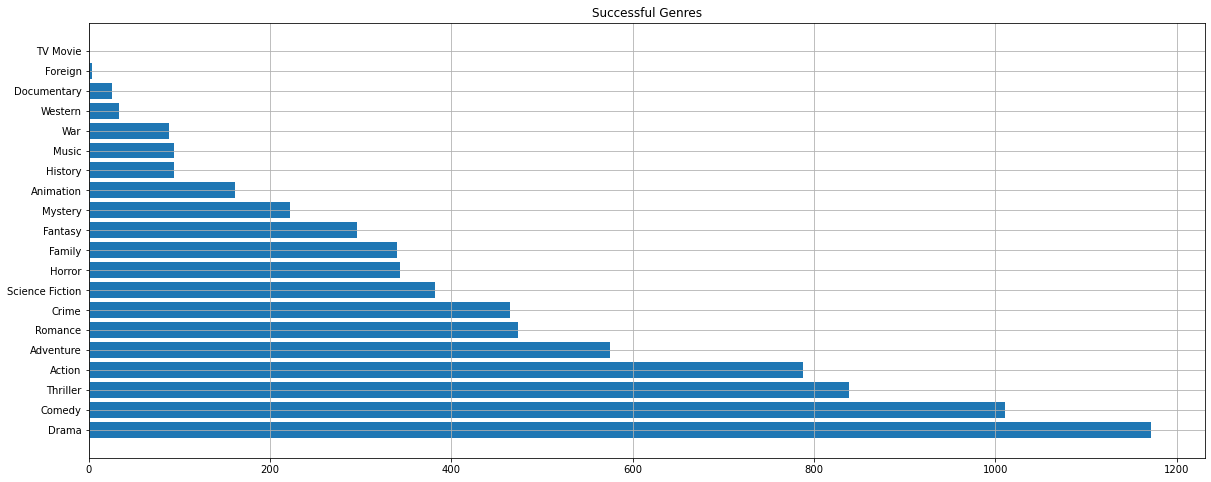

In [37]:
# Now let's plot the output
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.barh(splitted.index, splitted)
ax1.set_title("Successful Genres")
ax1.grid()
plt.show()

So the most successful genres are Drama followed by Comedy. That's for the movie profits view, Let's recheck it from the audience votes view and the popularity view of each category.<br/><br/>

So first, we need to prepare the data then plot the output

In [38]:
# for the viewer view and popularity view we can use the cleaned dataframe to count all movies in the dataset as viewers don't
# care much about whether the movie was successful or not rather than did it enjoy them or not.

# This cell will take sometime to run as it will rotate through each row in the successful_movies dataframe and process the
# needed data
another_compare = pd.DataFrame(columns=["genres", "vote_average", "popularity"])

# A loop to create a dataframe of different genres of each movie accompanied by the rate score and popularity of that movie 
for index, row in df_cleaned.iterrows():
    
    # Split each genre and convert it into a pandas series
    genres = row["genres"].split("|")
    genres = pd.Series(genres)
    
    # for each genre
    for genre in genres:
        # Prepare the data to be appended
        data={"genres": genre, "vote_average": row["vote_average"], "popularity": row["popularity"]}
        # Append data
        another_compare = another_compare.append(data, ignore_index=True)

In [39]:
# Now let's group the collected data by genre and calculate the average of other columns
another_compare = another_compare.groupby("genres")[["vote_average", "popularity"]].mean()

### Research Question 12 (Genres that attracts more viewers)

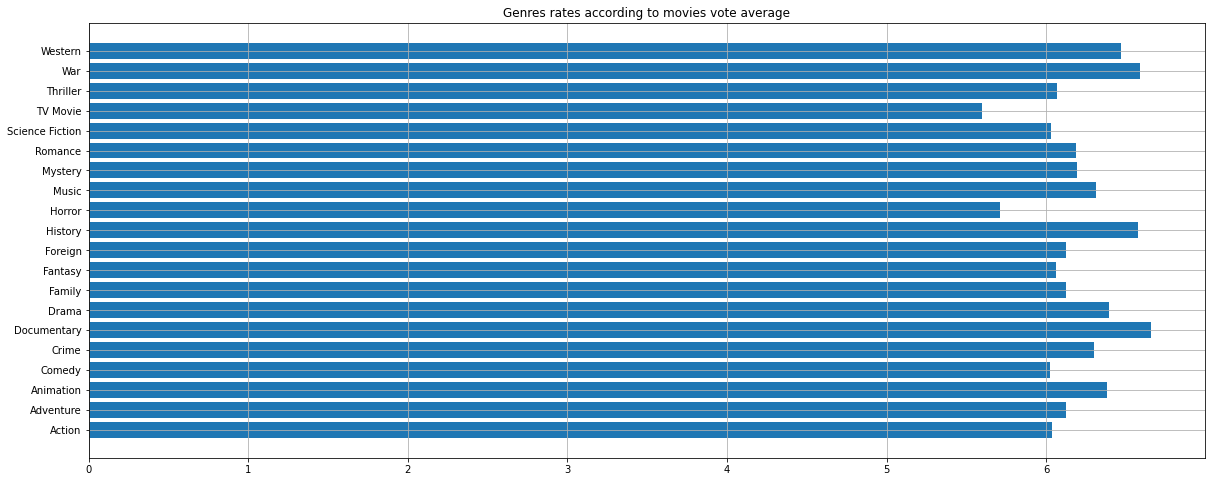

In [40]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.barh(another_compare.index, another_compare["vote_average"])
ax1.grid()
ax1.set_title("Genres rates according to movies vote average")
plt.show()

It appears that all categories have rates above 6.0 except "Horror" and "TV Movie".

### Research Question 13 (Most popular genres)

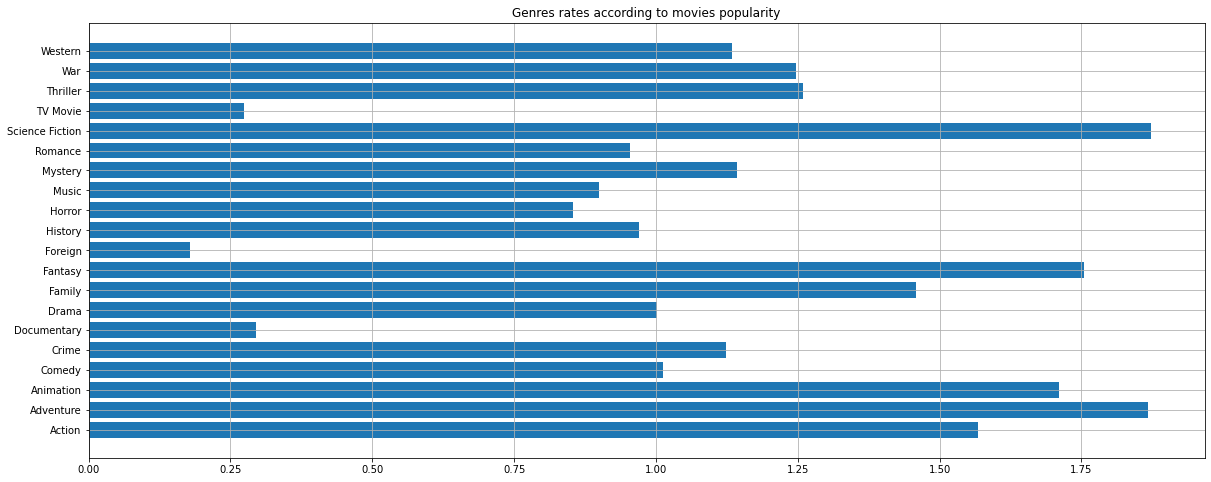

In [41]:
fig, ax1 = plt.subplots(figsize=(20,8))
ax1.barh(another_compare.index, another_compare["popularity"])
ax1.grid()
ax1.set_title("Genres rates according to movies popularity")
plt.show()

Observing the graph, "Science Fiction", "Fantasy", and "Adventure" are the most popular categories between the movies

### Research Question 14 (Common casts)

To answer this final question, we can reuse the function written in question 11 which was used to seperate genres by "|"

In [42]:
cast_counts = splitter(successful_movies, "cast").head(10)
cast_counts

Robert De Niro       38
Bruce Willis         33
Tom Hanks            33
Tom Cruise           31
Brad Pitt            30
Samuel L. Jackson    30
Denzel Washington    29
Harrison Ford        28
Morgan Freeman       28
Johnny Depp          27
dtype: int64

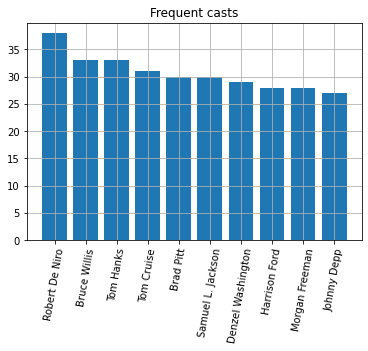

In [43]:
# Let's plot the results
fig, ax1 = plt.subplots()
ax1.bar(x=cast_counts.index, height=cast_counts)
ax1.grid()
ax1.set_title("Frequent casts")
plt.xticks(rotation=80)
plt.show()

Seems like the top 6 casters are Robert De Niro, Bruce Willis, Tom Hanks, Tom Cruise, Samuel L. Jackson, and Brad Pitt.

<a id='conclusions'></a>
## Conclusions

> These are some interesting facts that we came out with. We can even summarize them and predict how to get a movie to make a hit of success between others
 >> 1) The runtime duration must be around 150 minutes.<br/>
 >> 2) To make the movie get more views, it must include any of the following genres: Drama, Comedy, Thriller, Action, Romance.<br/>
 >> 3) To make the movie more popular, it must include any of the following genres: Adventure, Fantasy, Science Fiction.<br/>
 >> 4) The top 5 casters should be in the cast: Robert De Niro, or Bruce Willis, or Tom Hanks, or Tom Cruise, or Samuel L. Jackson, or Brad Pitt.<br/>
>
> Having a movie with these characteristics, It can make a success hit with a very high profit.

## Limitations

> 1) Removing many columns of NAN fields decreased the accuracy of the overall analysis.<br/>
> 2) Considering dollar as the unit currency for budgets, revenues, and profits. Movies might be released in other countries with different currencies.<br/>
> 3) The conclusion is not 100% guaranteed but it gives high propability that the movie can make a hit using these characteristics.<br/>
> 4) During analysis, I splitted the columns whose data seperated by pipelines (|) and used this method in loops and collected some outputs in dictionaries to easily parse the data, But it increases the time of obtaining the results.